In [1]:
# project: p2
# submitter: ratushko
# partner: none
# hours: 17

In [2]:
import loans
import search
import numpy as np
from time import time
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
bank = loans.Bank("First Home Bank")

In [5]:
#Q1
fhb_interest_list = []

for i in range(len(bank)):
    if bank[i].interest_rate != -1:
        fhb_interest_list.append(bank[i].interest_rate)
    
np.mean(fhb_interest_list)

2.962962962962963

In [6]:
#Q2
fbh_applicant_list = []

for i in range(len(bank)):
    num_apps = len(bank[i].applicants)
    fbh_applicant_list.append(num_apps)
    
np.mean(fbh_applicant_list)

1.5777777777777777

In [7]:
#Q3
ages_list = []
distribution_ages_dict = {}

for i in range(len(bank)):
    for j in range(len(bank[i].applicants)):
        ages_list.append(bank[i].applicants[j].age)
                         
for age in ages_list:
    if age not in distribution_ages_dict:
        distribution_ages_dict[age] = 0
    distribution_ages_dict[age] += 1
    
distribution_ages_dict

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [8]:
tree = search.BST()

for loan in bank:
    tree.add(loan.interest_rate, loan)

In [9]:
#Q4
len(tree.__getitem__(-1))

18

In [10]:
#Q5
tree.root.height()

9

In [11]:
uwcu_bank = loans.Bank("University of Wisconsin Credit Union")

In [12]:
uwcu_tree = search.BST()

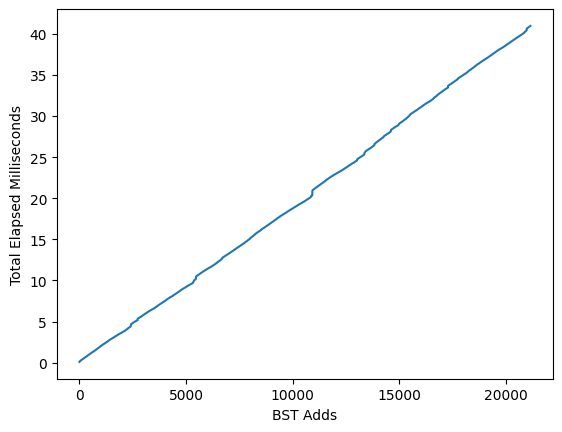

In [13]:
#Q6
times_dict = {}
counter = 0
start = time()

for loan in uwcu_bank:
    uwcu_tree.add(loan.interest_rate, loan)
    counter += 1
    end = time()
    milliseconds = (end - start) * 1000
    times_dict[counter] = milliseconds
    
s = pd.Series(times_dict)
s.plot.line(ylabel="Total Elapsed Milliseconds", xlabel="BST Adds")
None

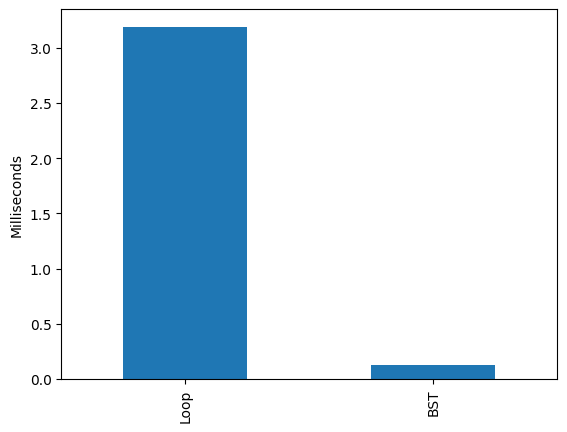

In [14]:
#Q7
master_times_dict = {}
root_queue = [uwcu_tree.root]
missing_count = 0
start_bst = time()

while len(root_queue) > 0:
    j = root_queue.pop(0)
    if j.key == -1:
        for val in j.values:
            missing_count += 1
            
    if j.left != None:
        root_queue.append(j.left)
    if j.right != None:
        root_queue.append(j.right)
        
end_bst = time()

bst_milliseconds = (end_bst - start_bst) * 2500
master_times_dict["Loop"] = bst_milliseconds

start_loop = time()
len(uwcu_tree[-1])
end_loop = time()

loop_milliseconds = (end_loop - start_loop) * 2500
master_times_dict["BST"] = loop_milliseconds

s = pd.Series(master_times_dict)
s.plot.bar(ylabel="Milliseconds")
None

<AxesSubplot:>

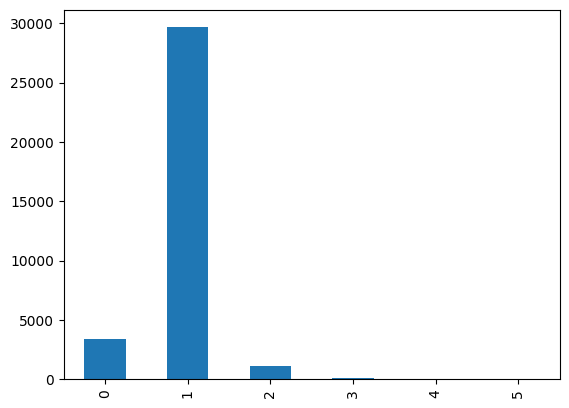

In [15]:
#Q8
races_dict = {} 
races_list = [] 

for loan in uwcu_bank:
    for applicant in loan.applicants:
        races_list.append(len(applicant.race))
    
for val in races_list:
    if val not in races_dict.keys():
        races_dict[val] = 0
    else:
        races_dict[val] += 1
        
s = pd.Series(races_dict).sort_index()
s.plot.bar()

In [16]:
#Q9
uwcu_tree.root.total()

9

In [17]:
#Q10
def top(node, n):
    if node == None:
        return []
    top_list = [node.key] + top(node.right, n) + top(node.left, n)
    top_list.sort()
    return top_list[-n:]
    
top(uwcu_tree.root, 3)[0]

5.99